# Assignment 1 - Question 1 & Question 2
# Submitted by: Ursula Das (21032821) and Aman Kumar (20954277)

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import random

import warnings
warnings.filterwarnings("ignore")

random.seed(69)
%matplotlib inline

In [66]:
#Adding header row

#/content/abalone.csv
data=pd.read_csv('/content/abalone.csv',names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])


## Exploratory Data Analysis

### A quick look into the dataset

In [36]:
data.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [37]:
print("Number of features in this dataset: {}".format(data.shape[1]))
print("Number of rows in this dataset: {}".format(data.shape[0]))

Number of features in this dataset: 9
Number of rows in this dataset: 4177


There are 9 features in this dataset namely :

1.  Sex 
2.  Length -
3.  Diameter
4.  Height
5.  Whole weight
6.  Shucked weight
7.  Viscera weight
8.  Shell Weight
9.  Rings


The target variable (the feature to predict) is Rings.

There are 4177 data samples (rows) in this dataset.

In [38]:
# Checking for the count of negative values and zero values in any column

numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']

print("Count of negative values in a column\n",data[data[numerical_columns] < 0].count())

print("Count of zero values in a column\n",data[data[numerical_columns] == 0].count())


Count of negative values in a column
 Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64
Count of zero values in a column
 Sex               0
Length            0
Diameter          0
Height            2
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


### Boxplots and outlier analysis

Diameter          59
Height            29
Length            49
Sex                0
Shell weight      35
Shucked weight    48
Viscera weight    26
Whole weight      30
dtype: int64


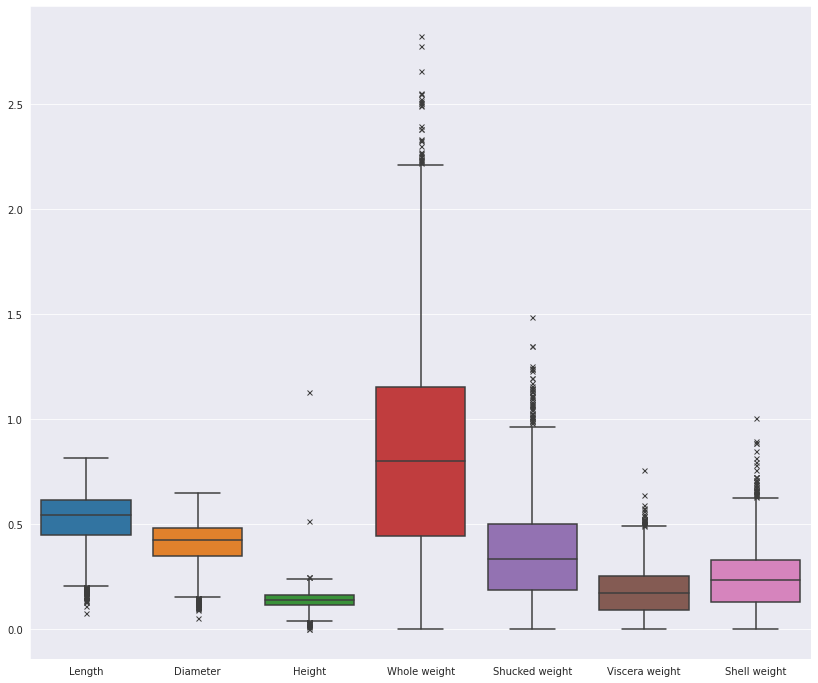

In [39]:
# Checking for Outliers
data1=data.iloc[:,0:-1]
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
print(((data1 < (Q1 - (1.5 * IQR))) | (data1  > (Q3 + (1.5 * IQR)))).sum())

plt.figure(figsize=(14,12))
sns.boxplot(data = data.iloc[:,0:-1],flierprops={"marker": "x"})


### Data distribution of each feature

In [40]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71b50dbb80>,
      dtype=object)

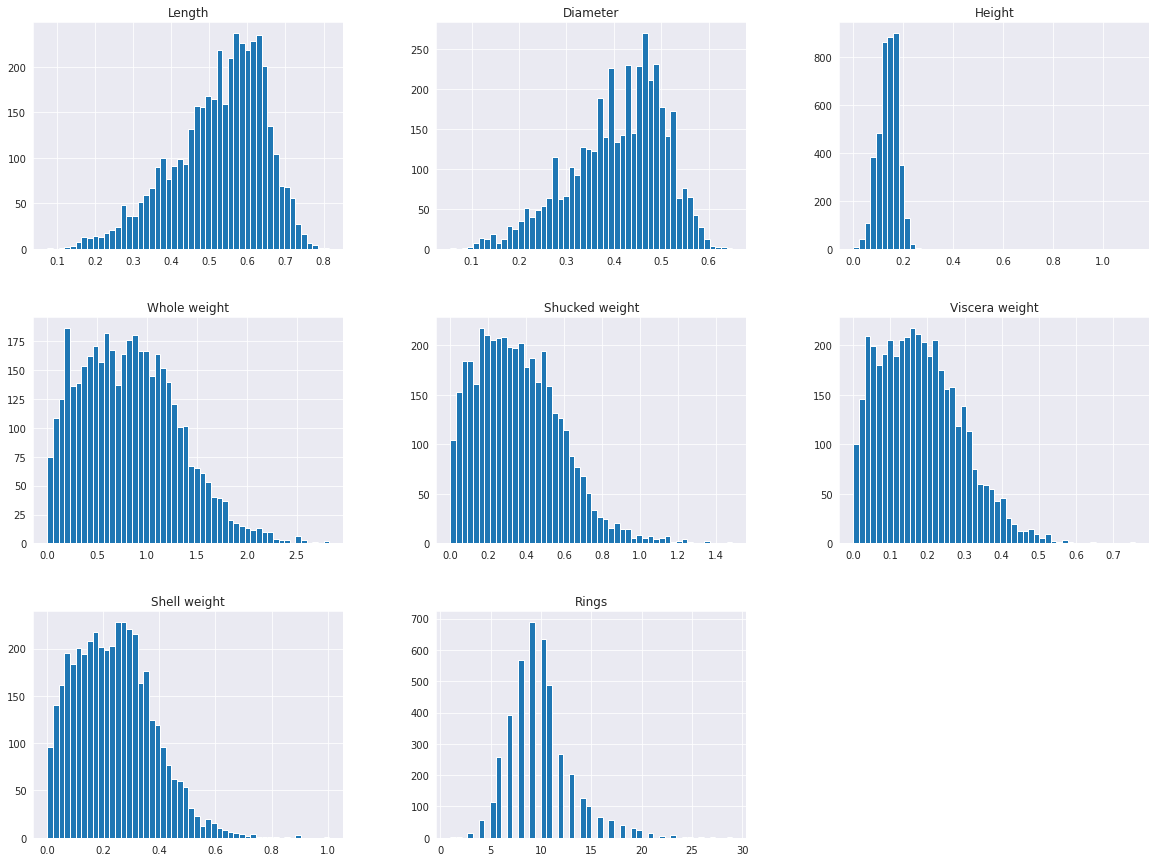

In [41]:
# Histogram
data.hist(bins=50, figsize=(20, 15))

### Analyzing Summarization Statistics (Mean, Median, Variance, Skewness, Kurtosis)

In [42]:
#Mean

data.mean()

Length            0.523992
Diameter          0.407881
Height            0.139516
Whole weight      0.828742
Shucked weight    0.359367
Viscera weight    0.180594
Shell weight      0.238831
Rings             9.933684
dtype: float64

In [67]:
#Mode

data.mode().iloc[0,:]

Sex                    M
Length              0.55
Diameter            0.45
Height              0.15
Whole weight      0.2225
Shucked weight     0.175
Viscera weight    0.1715
Shell weight       0.275
Rings                9.0
Name: 0, dtype: object

In [44]:
#Median

data.median()

Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
Rings             9.0000
dtype: float64

In [45]:
# Variance
data.var()

Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
Rings             10.395266
dtype: float64

In [46]:
# Skewness
data.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [47]:
# Kurtosis
data.kurtosis()

Length             0.064621
Diameter          -0.045476
Height            76.025509
Whole weight      -0.023644
Shucked weight     0.595124
Viscera weight     0.084012
Shell weight       0.531926
Rings              2.330687
dtype: float64

### Analyzing missing data

In [48]:
data.isnull().sum()
# There is no missing data

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

### Pairsplots analysis

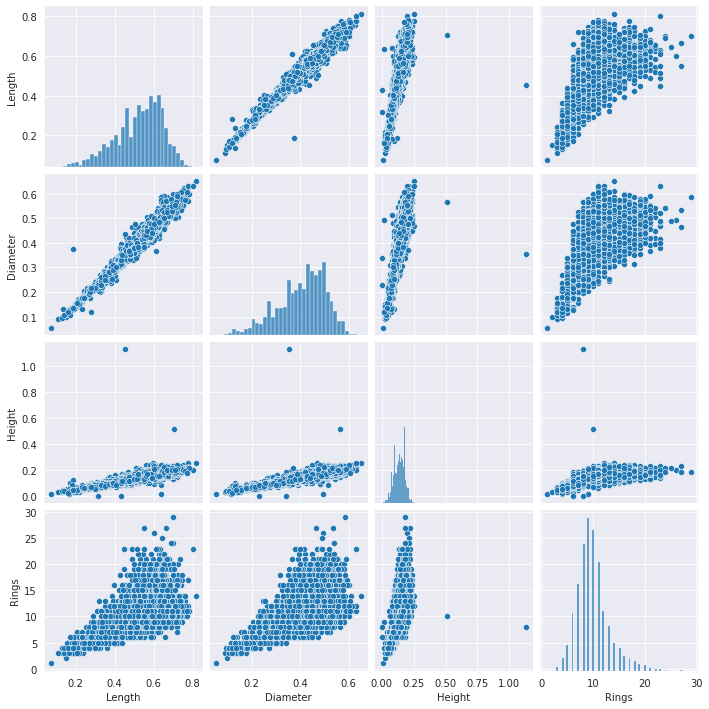

In [49]:
# Pairsplots for dimensional features

sns.set_style('darkgrid')
sns.pairplot(data,x_vars=['Length','Diameter','Height','Rings'],y_vars=['Length','Diameter','Height','Rings'])
#sns.pairplot(data,hue='Rings')

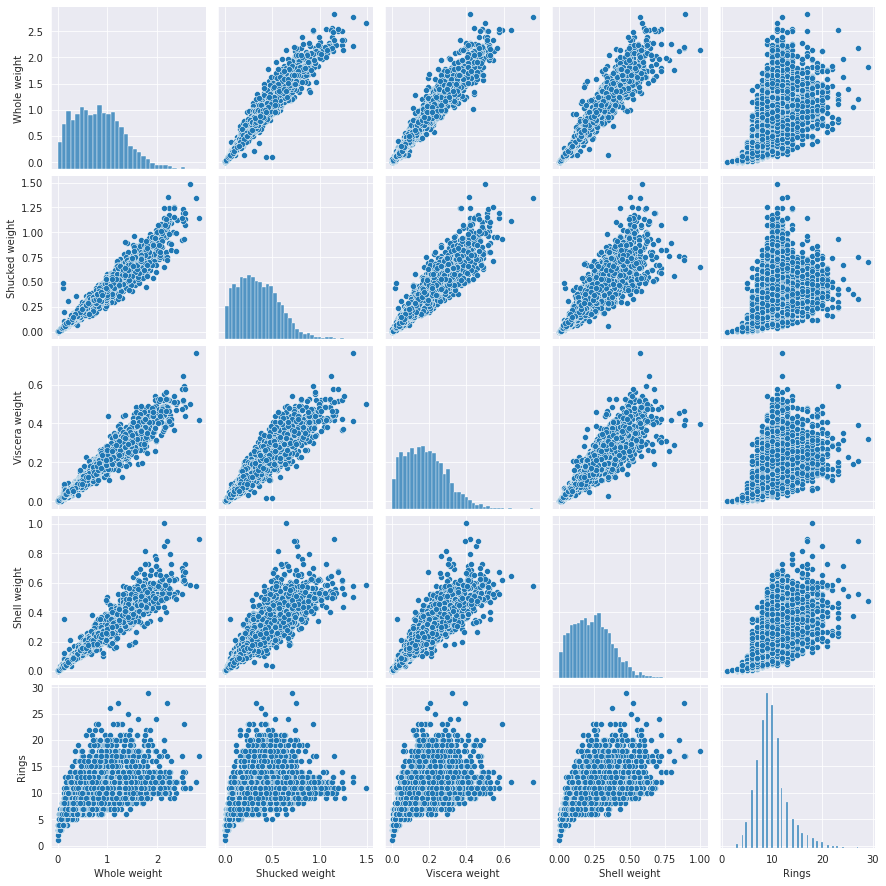

In [50]:
# Pairsplots for weight features

sns.set_style('darkgrid')
sns.pairplot(data,x_vars=['Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'],y_vars=['Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])
#sns.pairplot(data,hue='Rings')

### Correlation between features

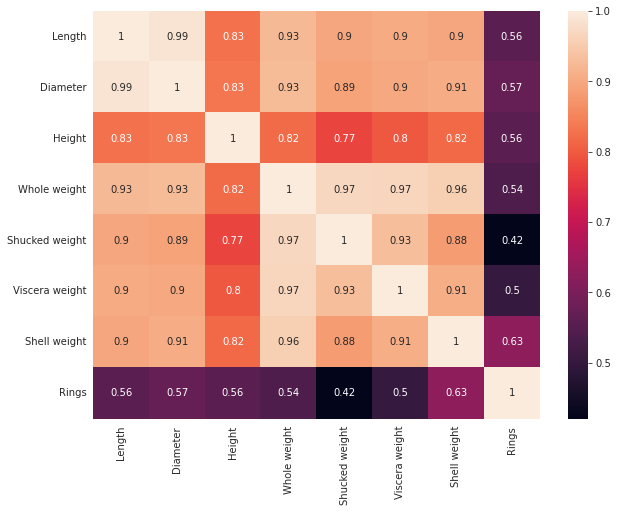

In [51]:
plt.figure(figsize=(10,7.5))
sns.heatmap(data.corr(),annot=True)

### Is the dataset balanced?

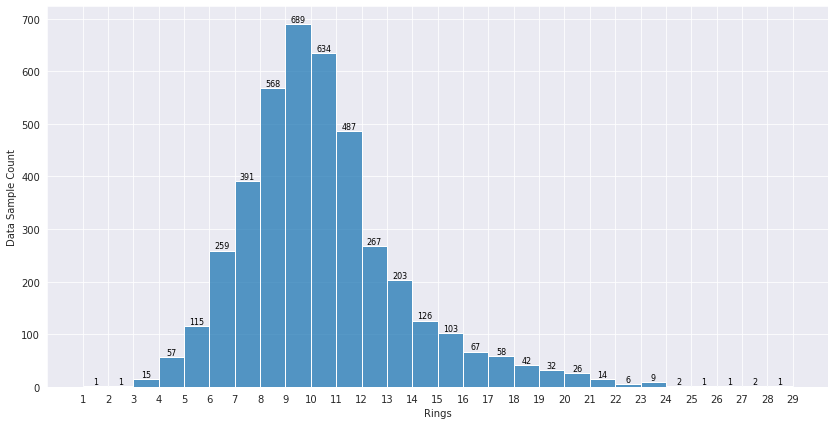

In [52]:
plt.figure(figsize=(14,7))
ax = sns.histplot(data = data["Rings"], binwidth = 1)
plt.xticks(np.arange(min(data["Rings"]), max(data["Rings"])+1, 1.0))
ax.set_ylabel("Data Sample Count")
# Get the heights of the bars
heights = [p.get_height() for p in ax.containers[0].patches]

# Get the x and y positions of the bars
x = [p.get_x() + p.get_width() / 2.0 for p in ax.containers[0].patches]
y = [p.get_y() + p.get_height() for p in ax.containers[0].patches]

# Loop through the bars and add the text labels
for i, v in enumerate(heights):
    ax.text(x[i], y[i], str(v), ha='center', va='bottom', fontsize=8, color='black')

## Preprocessing the dataset

### Normalizing the data using z-score normalization

In [53]:
continuous_features = ["Length",	"Diameter",	"Height",	"Whole weight",	"Shucked weight",	"Viscera weight",	"Shell weight"]
scaler = StandardScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,15
1,M,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,7
2,F,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,9
3,M,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,10
4,I,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,11
4173,M,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,10
4174,M,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,9
4175,F,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,10


### One-hot encoding the categorical variables

In [54]:
X = data.iloc[:, data.columns != "Rings"]
Y = data["Rings"]

#One Hot-Encoding for categorical data: Sex is the only categorical variable so processing it
X = pd.get_dummies(X, columns = ["Sex"])

#Drop one dummy column to avoid dummy variable trap
X.drop(['Sex_I'], axis='columns',inplace = True)
X
#'Diameter','Shucked weight','Viscera weight'

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_M
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,0,1
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,0,1
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,1,0
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0,1
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,0,0
...,...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,1,0
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0,1
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,0,1
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,1,0


## Classification with KNN

### Training the model with the classifier's default parameters

In [55]:
# Splitting the dataset into 80/20 train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [56]:
# Training the KNN classifier on train set and evaluating its performance on train and test sets

classifier = KNeighborsClassifier() # By default, k_neighbors = 5
classifier = classifier.fit(X_train, Y_train)
train_score = classifier.score(X_train, Y_train)
test_score = classifier.score(X_test, Y_test)

print("Accuracy on the training set: {0:.3f}%".format(train_score*100))
print("Accuracy on the test set: {0:.3f}%".format(test_score*100))

Accuracy on the training set: 43.370%
Accuracy on the test set: 22.368%


### Tuning the classifier, that is finding the best value of n_neighbors (Nearest neighbors)

In [57]:
# setting the number of cross-validation folds = 5
num_folds = 5
max_score = -1
best_k = -10
avg_cross_vals = []

for k in range(5,100):
  classifier = KNeighborsClassifier(n_neighbors = k)
  cross_val_scores = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = num_folds)
  #print("5-fold cross validation scores on training set: ", cross_val_scores)
  # can also take best value
  avg_score = np.mean(cross_val_scores)*100
  avg_cross_vals.append(avg_score)
  if max_score < avg_score:
    max_score = avg_score
    best_k = k
    print("Average 5-fold CV score: {0:.3f}% (at n_neighbors = {1})".format(max_score, best_k))
    #print("Best value of k so far: ", best_k)

print("\nBest average 5-fold cross-validation score on the training set: {0:.3f}%".format(max_score))
print("Best value of n_neighbors found: ", best_k)

Average 5-fold CV score: 21.640% (at n_neighbors = 5)
Average 5-fold CV score: 21.700% (at n_neighbors = 7)
Average 5-fold CV score: 22.388% (at n_neighbors = 8)
Average 5-fold CV score: 22.718% (at n_neighbors = 9)
Average 5-fold CV score: 23.676% (at n_neighbors = 10)
Average 5-fold CV score: 24.274% (at n_neighbors = 12)
Average 5-fold CV score: 24.274% (at n_neighbors = 13)
Average 5-fold CV score: 24.513% (at n_neighbors = 14)
Average 5-fold CV score: 24.633% (at n_neighbors = 18)
Average 5-fold CV score: 24.932% (at n_neighbors = 19)
Average 5-fold CV score: 24.992% (at n_neighbors = 21)
Average 5-fold CV score: 25.112% (at n_neighbors = 23)
Average 5-fold CV score: 25.202% (at n_neighbors = 25)
Average 5-fold CV score: 25.231% (at n_neighbors = 28)
Average 5-fold CV score: 25.321% (at n_neighbors = 29)
Average 5-fold CV score: 25.411% (at n_neighbors = 31)
Average 5-fold CV score: 25.949% (at n_neighbors = 33)
Average 5-fold CV score: 26.069% (at n_neighbors = 37)
Average 5-fold

Text(0, 0.5, 'Average cross-validation score')

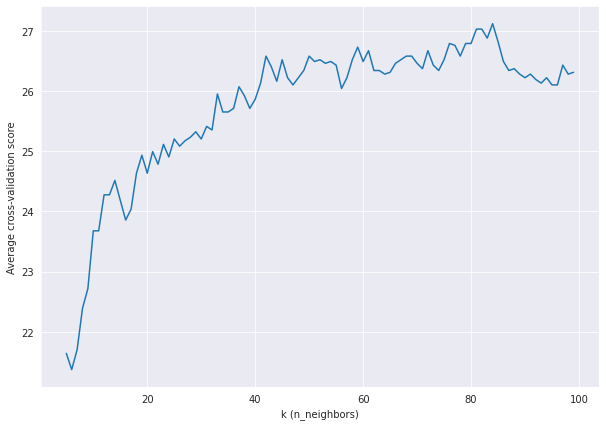

In [58]:
plt.figure(figsize=(10,7))
ax = sns.lineplot(range(5,100),avg_cross_vals)
ax.set_xlabel("k (n_neighbors)")
ax.set_ylabel("Average cross-validation score")
# plt.show()

### Evaluating the performance of the best KNN model on the Test set

In [59]:
classifier = KNeighborsClassifier(n_neighbors = best_k)
classifier = classifier.fit(X_train, Y_train)
test_score = classifier.score(X_test, Y_test)
print("Accuracy on the test dataset: {0:.3f}%".format(test_score*100))

Accuracy on the test dataset: 26.435%


## Improving KNN - weighted KNN

In [60]:
classifier = KNeighborsClassifier(n_neighbors = best_k, weights = 'distance')
classifier = classifier.fit(X_train, Y_train)
test_score = classifier.score(X_test, Y_test)
print("Accuracy on the test dataset: {0:.3f}%".format(test_score*100))

Accuracy on the test dataset: 27.632%
